In [1]:
# Property Price Prediction - Part A
# Name: [Preetham Boda]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("housing.csv")
print(data.head())

    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -120.589617  34.282101                  28         3896            1907   
1 -114.804828  37.639288                   7          334            1660   
2 -117.000781  40.754420                  35         9220            2973   
3 -118.339469  39.430236                  28         3707            2009   
4 -122.783573  40.129740                  14         8143            2757   

   population  households  median_income  median_house_value ocean_proximity  
0        3580        1632          12.74              292919          INLAND  
1        3961         337           8.16              484791       <1H OCEAN  
2        2085        1257          13.81              180279          INLAND  
3        4703        2096          14.03              430769        NEAR BAY  
4        2878        1315           3.73              461848          INLAND  


In [ ]:
data = data.copy()
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)



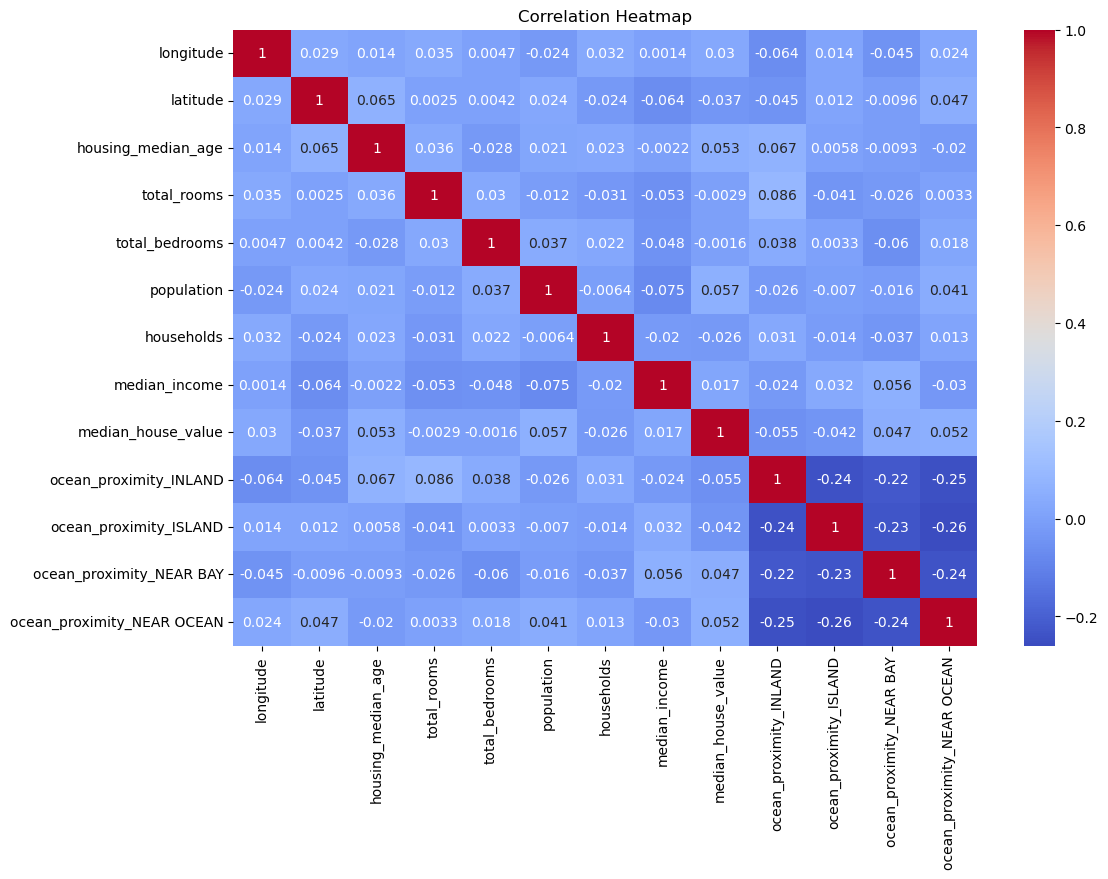

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
X_simple = data[["median_income"]]
y = data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)


In [7]:
print("\nSimple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("R² Score:", r2_score(y_test, y_pred_simple))


Simple Linear Regression:
MSE: 17814223691.76737
RMSE: 133469.93553518847
R² Score: -0.0009673441801565374


In [8]:
features = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"] +            [col for col in data.columns if "ocean_proximity_" in col]
X_multi = data[features]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)

In [9]:
print("\nMultiple Linear Regression:")
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))
print("R² Score:", r2_score(y_test_m, y_pred_multi))


Multiple Linear Regression:
MSE: 17778266682.63037
RMSE: 133335.16671392575
R² Score: 0.0010530521370377688


In [10]:
print("\nConclusion:")
if r2_score(y_test_m, y_pred_multi) > r2_score(y_test, y_pred_simple):
    print("Multiple Linear Regression performed better.")
else:
    print("Simple Linear Regression performed better.")



Conclusion:
Multiple Linear Regression performed better.


In [1]:
# Customer Churn Prediction - Part B
# Name: [Preetham Boda]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
data = pd.read_csv("customer_churn.csv")
print(data.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes         No      48           No   
1    Male              0     Yes         No      57          Yes   
2    Male              1     Yes        Yes      69           No   
3  Female              1     Yes         No      60          Yes   
4  Female              0     Yes         No      25           No   

      MultipleLines InternetService       OnlineSecurity        Contract  \
0  No phone service             DSL  No internet service        One year   
1               Yes     Fiber optic  No internet service  Month-to-month   
2  No phone service     Fiber optic                   No        One year   
3                No     Fiber optic                   No        One year   
4  No phone service             DSL                   No        One year   

   MonthlyCharges  TotalCharges Churn  
0           58.98       6332.73   Yes  
1           75.24        832.95    No  
2           95

In [3]:
label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])


In [4]:
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.545
Precision: 0.5063291139240507
Recall: 0.43478260869565216
F1 Score: 0.4678362573099415

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60       108
           1       0.51      0.43      0.47        92

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200



In [8]:
# Early Disease Detection - Heart Disease - Part C
# Name : [Preetham Boda]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [9]:
data = pd.read_csv("heart_disease.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   53    0   3       115   317    0        0      106      0      2.7      0   
1   35    0   0       190   366    1        1      109      0      0.2      1   
2   43    0   1       148   474    1        1      135      0      4.5      1   
3   72    0   1       122   150    1        0      114      0      6.0      1   
4   74    1   0       172   515    1        1      147      0      2.9      0   

   ca  thal  target  
0   1     1       0  
1   1     2       1  
2   0     3       0  
3   3     3       1  
4   1     2       0  


In [10]:
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.505
Precision: 0.5268817204301075
Recall: 0.47115384615384615
F1 Score: 0.49746192893401014

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.54      0.51        96
           1       0.53      0.47      0.50       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

